# Using SVM

## Using Linear Kernel

In [1]:
import pandas as pd
import numpy as np
# for graph
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm

In [3]:
# loading dataset
cancer = datasets.load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
cancer.feature_names.shape

(30,)

In [8]:
x = cancer.data
y = cancer.target

In [9]:
x.shape , y.shape

((569, 30), (569,))

In [10]:
x[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [12]:
# standardization, bring inputs into small scale in range ( -3,3 )
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [13]:
# without standardization
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 1, stratify = y)
clf = svm.SVC(kernel='linear')
clf.fit(x_train,y_train)
y_predict = clf.predict(x_test)
print('accuracy: ', metrics.accuracy_score(y_test, y_predict))
print('precision: ', metrics.precision_score(y_test,y_predict))
print('recall: ', metrics.recall_score(y_test, y_predict))

accuracy:  0.9649122807017544
precision:  0.9594594594594594
recall:  0.9861111111111112


In [14]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.2, random_state = 1, stratify = y)

accuracy:  0.9912280701754386
precision:  0.9863013698630136
recall:  1.0
confusion matrix


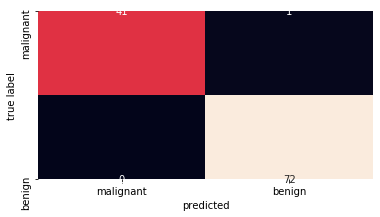

In [15]:
clf = svm.SVC(kernel='linear')
clf.fit(x_train,y_train)
y_predict = clf.predict(x_test)
print('accuracy: ', metrics.accuracy_score(y_test, y_predict))
print('precision: ', metrics.precision_score(y_test,y_predict))
print('recall: ', metrics.recall_score(y_test, y_predict))
print('confusion matrix')
mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(mat, square = True, annot = True, fmt = 'd', cbar = False,
           xticklabels = cancer.target_names,
           yticklabels = cancer.target_names)
plt.xlabel('predicted')
plt.ylabel('true label')
plt.show()

In [16]:
element, count = np.unique(y_test, return_counts = True)
element, count

(array([0, 1]), array([42, 72], dtype=int64))

## Using Polynomial Kernel

accuracy:  0.9912280701754386
precision:  1.0
recall:  0.9861111111111112
confusion matrix


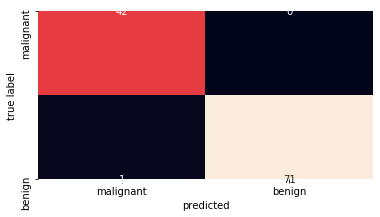

In [17]:
clf = svm.SVC(kernel='poly', degree = 1, gamma = 100)
clf.fit(x_train,y_train)
y_predict = clf.predict(x_test)
print('accuracy: ', metrics.accuracy_score(y_test, y_predict))
print('precision: ', metrics.precision_score(y_test,y_predict))
print('recall: ', metrics.recall_score(y_test, y_predict))
print('confusion matrix')
mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(mat, square = True, annot = True, fmt = 'd', cbar = False,
           xticklabels = cancer.target_names,
           yticklabels = cancer.target_names)
plt.xlabel('predicted')
plt.ylabel('true label')
plt.show()

## Using Sigmoid Kernel

accuracy:  0.9298245614035088
precision:  0.9324324324324325
recall:  0.9583333333333334
confusion matrix


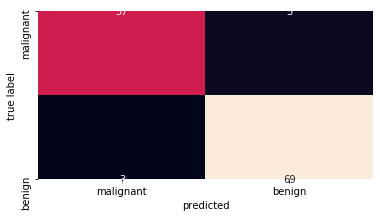

In [18]:
clf = svm.SVC(kernel='sigmoid', gamma = 200, C = 0.1)
clf.fit(x_train,y_train)
y_predict = clf.predict(x_test)
print('accuracy: ', metrics.accuracy_score(y_test, y_predict))
print('precision: ', metrics.precision_score(y_test,y_predict))
print('recall: ', metrics.recall_score(y_test, y_predict))
print('confusion matrix')
mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(mat, square = True, annot = True, fmt = 'd', cbar = False,
           xticklabels = cancer.target_names,
           yticklabels = cancer.target_names)
plt.xlabel('predicted')
plt.ylabel('true label')
plt.show()